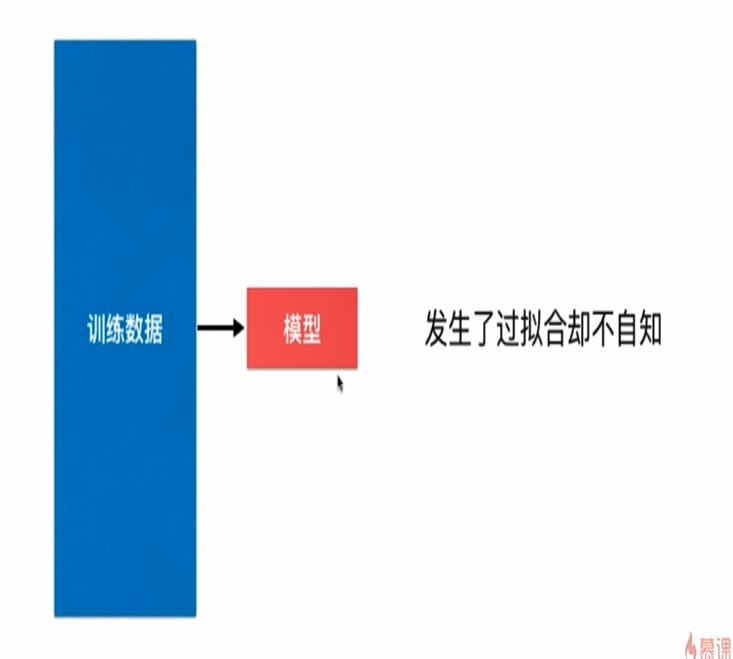

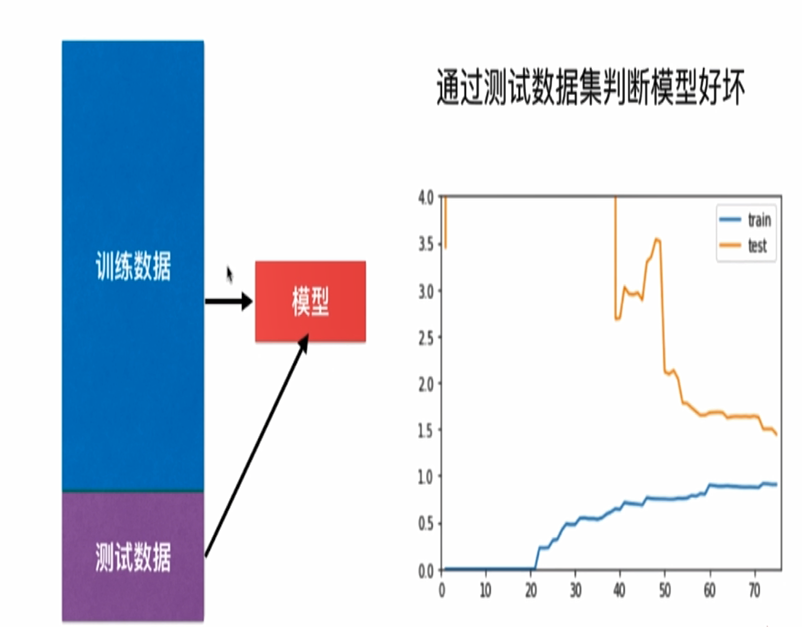

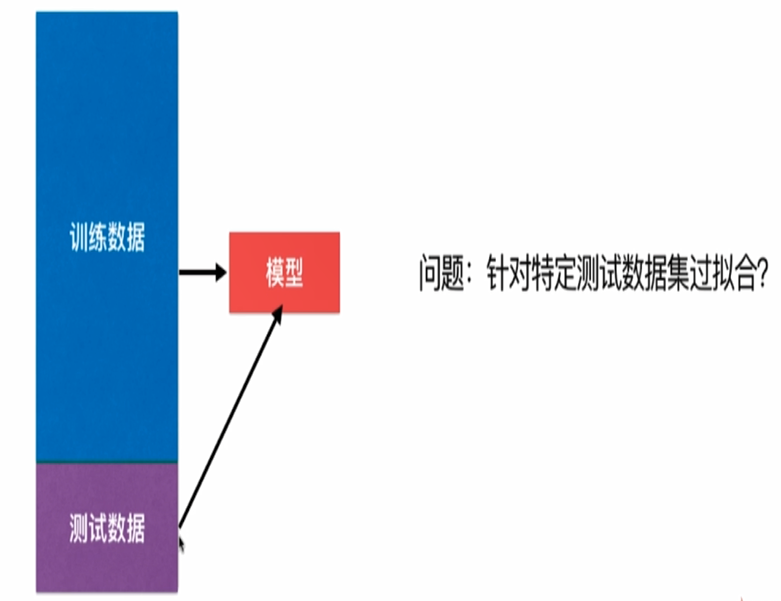

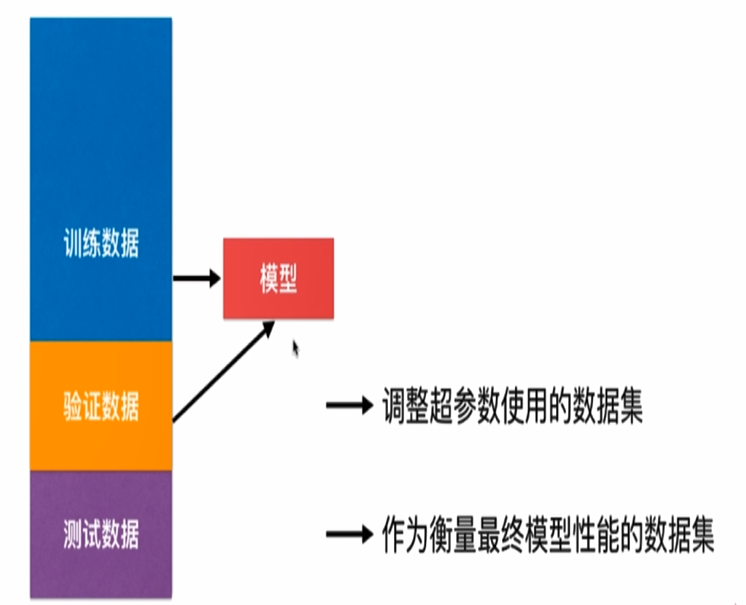

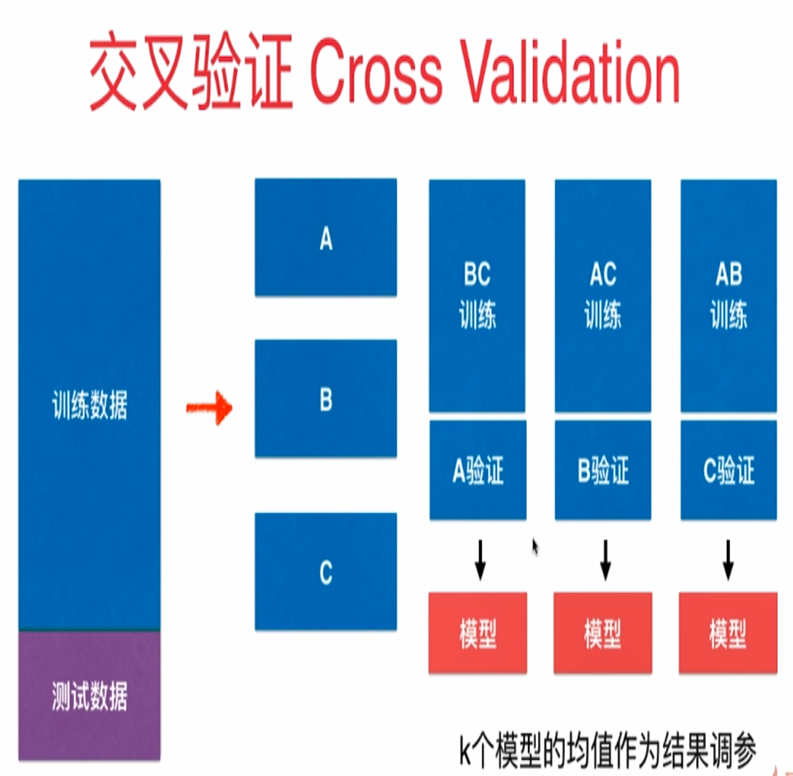

## 训练测试验证

In [1]:
import numpy as np
from sklearn import datasets

In [2]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.4,random_state=666)

In [6]:
from sklearn.neighbors import KNeighborsClassifier

best_score, best_p, best_k = 0, 0, 0
for k in range(2,11):
    for p in range(1, 6):
        knn_clf = KNeighborsClassifier(weights="distance", n_neighbors=k, p=p)
        knn_clf.fit(X_train, y_train)
        score = knn_clf.score(X_test, y_test)
        if score > best_score:
            best_score, best_p, best_k = score, p, k
            
print("Best K= ",best_k)
print("Best P= ",best_p)
print("Best Score= ",best_score)

Best K=  3
Best P=  4
Best Score=  0.9860917941585535


## 交叉验证

In [8]:
from sklearn.model_selection import cross_val_score

knn_clf = KNeighborsClassifier()
cross_val_score(knn_clf, X_train, y_train)

array([0.98895028, 0.97777778, 0.96629213])

In [9]:
best_score, best_p, best_k = 0, 0, 0
for k in range(2,11):
    for p in range(1, 6):
        knn_clf = KNeighborsClassifier(weights="distance", n_neighbors=k, p=p)
        scores = cross_val_score(knn_clf, X_train, y_train)
        score = np.mean(scores)
        if score > best_score:
            best_score, best_p, best_k = score, p, k
            
print("Best K= ",best_k)
print("Best P= ",best_p)
print("Best Score= ",best_score)

Best K=  2
Best P=  2
Best Score=  0.9823599874006478


In [10]:
best_knn_clf = KNeighborsClassifier(weights="distance", n_neighbors=2, p=2)

In [11]:
best_knn_clf.fit(X_train, y_train)
best_knn_clf.score(X_test, y_test)

0.980528511821975

## 回顾网格搜索

In [12]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {
        'weights' :['distance'],
        'n_neighbors' :[i for i in range(2,11)],
        'p' :[i for i in range(1,6)]
    }
]

grid_search = GridSearchCV(knn_clf, param_grid, verbose=1)
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 45 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:  2.0min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=5,
           weights='distance'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'weights': ['distance'], 'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'p': [1, 2, 3, 4, 5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [14]:
grid_search.best_score_

0.9823747680890538

In [15]:
grid_search.best_params_

{'n_neighbors': 2, 'p': 2, 'weights': 'distance'}

In [16]:
best_knn_clf = grid_search.best_estimator_
best_knn_clf.score(X_test, y_test)

0.980528511821975

In [17]:
cross_val_score(knn_clf, X_train, y_train, cv=5)

array([0.99543379, 0.96803653, 0.98148148, 0.96261682, 0.97619048])

In [18]:
GridSearchCV(knn_clf, param_grid, verbose=1, cv=5)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=5,
           weights='distance'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'weights': ['distance'], 'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'p': [1, 2, 3, 4, 5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

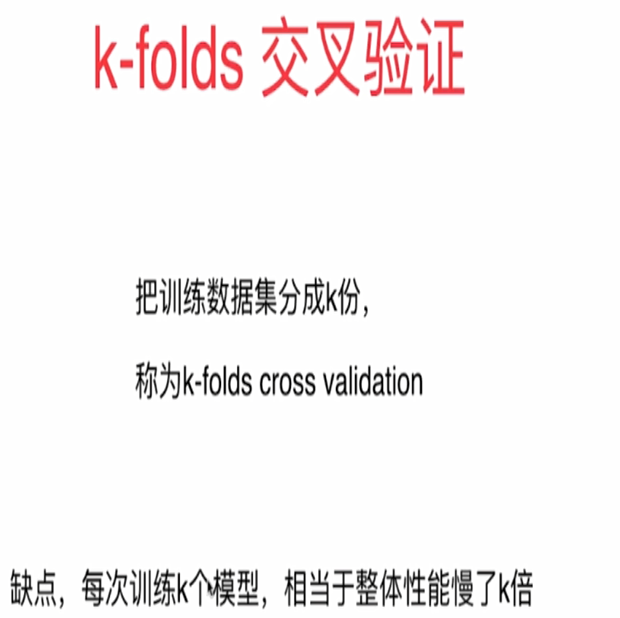

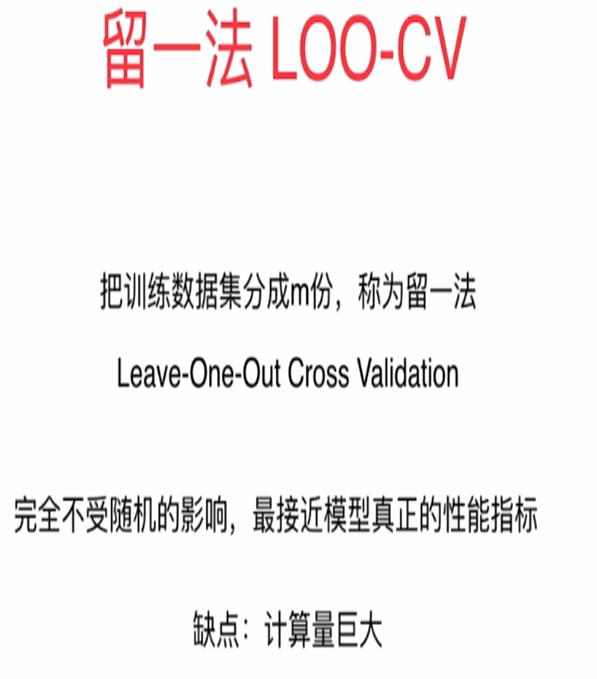